<a href="https://colab.research.google.com/github/dakotagporter/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module1-linear-correlation-regression/LS_DS_131_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 2, Module 1

###Learning Objectives:
- Student can create a scatterplot
- Student can identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- Student can identify linear and nonlinear relationships from a scatterplot
- Student can calculate and interpret linear correlation
- Student can calculate and interpret the slope and intercept of a simple linear regression model
- Sudent can predict a response from a simple linear regression model
- Student can calculate and interpret a residual

#Use the following information to answer the questions in the assignment:



###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [ ]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in kg
- Head, the head size in cubic cm

1) If we wish to predict brain weight from head size, which variable is the independent variable (also called the feature, explanatory or x variable) and which variable is the dependent variable (also called the target, response or y variable)?




Independent variable: Head Size

Dependent variable: Brain Weight

2) Draw a scatterplot showing the relationship between brain weight and head size.  Make sure to graph the correct variable on the correct axis and label your graph.

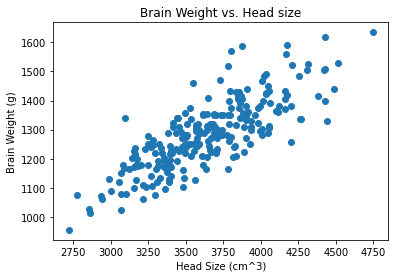

In [ ]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=df['Head'], y=df['Brain'])

ax.set_title('Brain Weight vs. Head size')
ax.set_ylabel('Brain Weight (g)')
ax.set_xlabel('Head Size (cm^3)')

plt.show()

3) Describe the strength and direction of the relationship between head size and brain weight.

This data looks like it has a strong, positive correlation.

4) Determine if there is any missing data in the dataset.

In [ ]:
### YOUR CODE HERE ###
df.isnull().sum()

Gender    0
Age       0
Head      0
Brain     0
dtype: int64

There is no missing data.


5) Calculate and interpret the correlation coefficient for the relationship between head size and brain weight.  

In [ ]:
### YOUR CODE HERE ###
r = np.corrcoef(df['Head'], df['Brain'])
r

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

The data has a strong, positive correlation.

6) Without doing any other calculations, determine the correlation of brain weight with head size.

As head size increases, brain weight increases.


7) Use Python to calculate the slope and intercept terms for the model of head size and brain weight.

In [ ]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols

model = ols('Brain ~ Head', data=df).fit()
model.params

Intercept    325.573421
Head           0.263429
dtype: float64

8) Use the model output above to write the linear model relating head size to brain weight (ie fill in the b terms with the correct numbers from above).

$$\hat{Y} = b_0 - b_1X$$



$\hat{Y} = 325.6 + 0.26X$

9) What does the slope term tell us about the relationship between head size and brain weight?

We expect brain weight to be about 1/4g heavier for each additional cubic centimeter of brain size.


10) What does the intercept tell us about the relationship between head size and brain weight?

No use to interpret the intercept, because there is no point where the brain weight or head size are equal to zero. 

11) Draw a scatterplot with the regression line overlayed on top of the points.

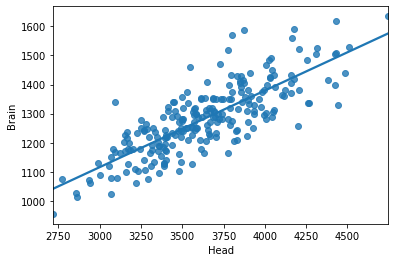

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns

sns.regplot(x='Head', y='Brain', data=df, ci=None)

12) A healty human has a brain size of 4100 cubic cm, how much do we expect his or her brain to weigh?

In [ ]:
### YOUR CODE HERE ###
x = 4100

intercept = model.params[0]
slope = model.params[1]

prediction = intercept + slope*x
prediction

1405.6337129559786

We expect it to weigh about 1405g.

13) Calculate and interpret the model residual for for the first observation in the dataset (head size = 4512 cubic cm).

In [ ]:
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
### YOUR CODE HERE ###
x = 4512
observed = 1530

intercept = model.params[0]
slope = model.params[1]

prediction = intercept + slope*x

residual = observed - prediction
residual

15.833399174388887

15.8

#Portfolio Project Assignment.

We're coming into the home stretch!  Finalize your project results.  Ask any lingering questions, and complete any revisions you have.  This would be a good time to have a classmate take a look at your project and point out anything missing or any obvious errors (they happen to everyone!).